In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
true_data_path = '../data/train_trx.parquet'
gen_data_path = '../gen/ckpt/generated_data/cosine_test_2023-10-31_12:39:06'
recon_data_path = '../gen/ckpt/reconstructed_data/cosine_test_2023-10-31_12:39:06'


In [12]:
train = pd.read_parquet(true_data_path)
gen = pd.read_parquet(gen_data_path)
recon = pd.read_parquet(recon_data_path)

In [36]:
train.columns

Index(['cl_id', 'amount', 'event_time', 'mcc', 'channel_type', 'currency',
       'trx_category', 'trx_count', 'target_target_flag', 'target_target_sum'],
      dtype='object')

In [19]:
df['amount']

0    100
1    200
2    300
3    400
4    500
Name: amount, dtype: int64

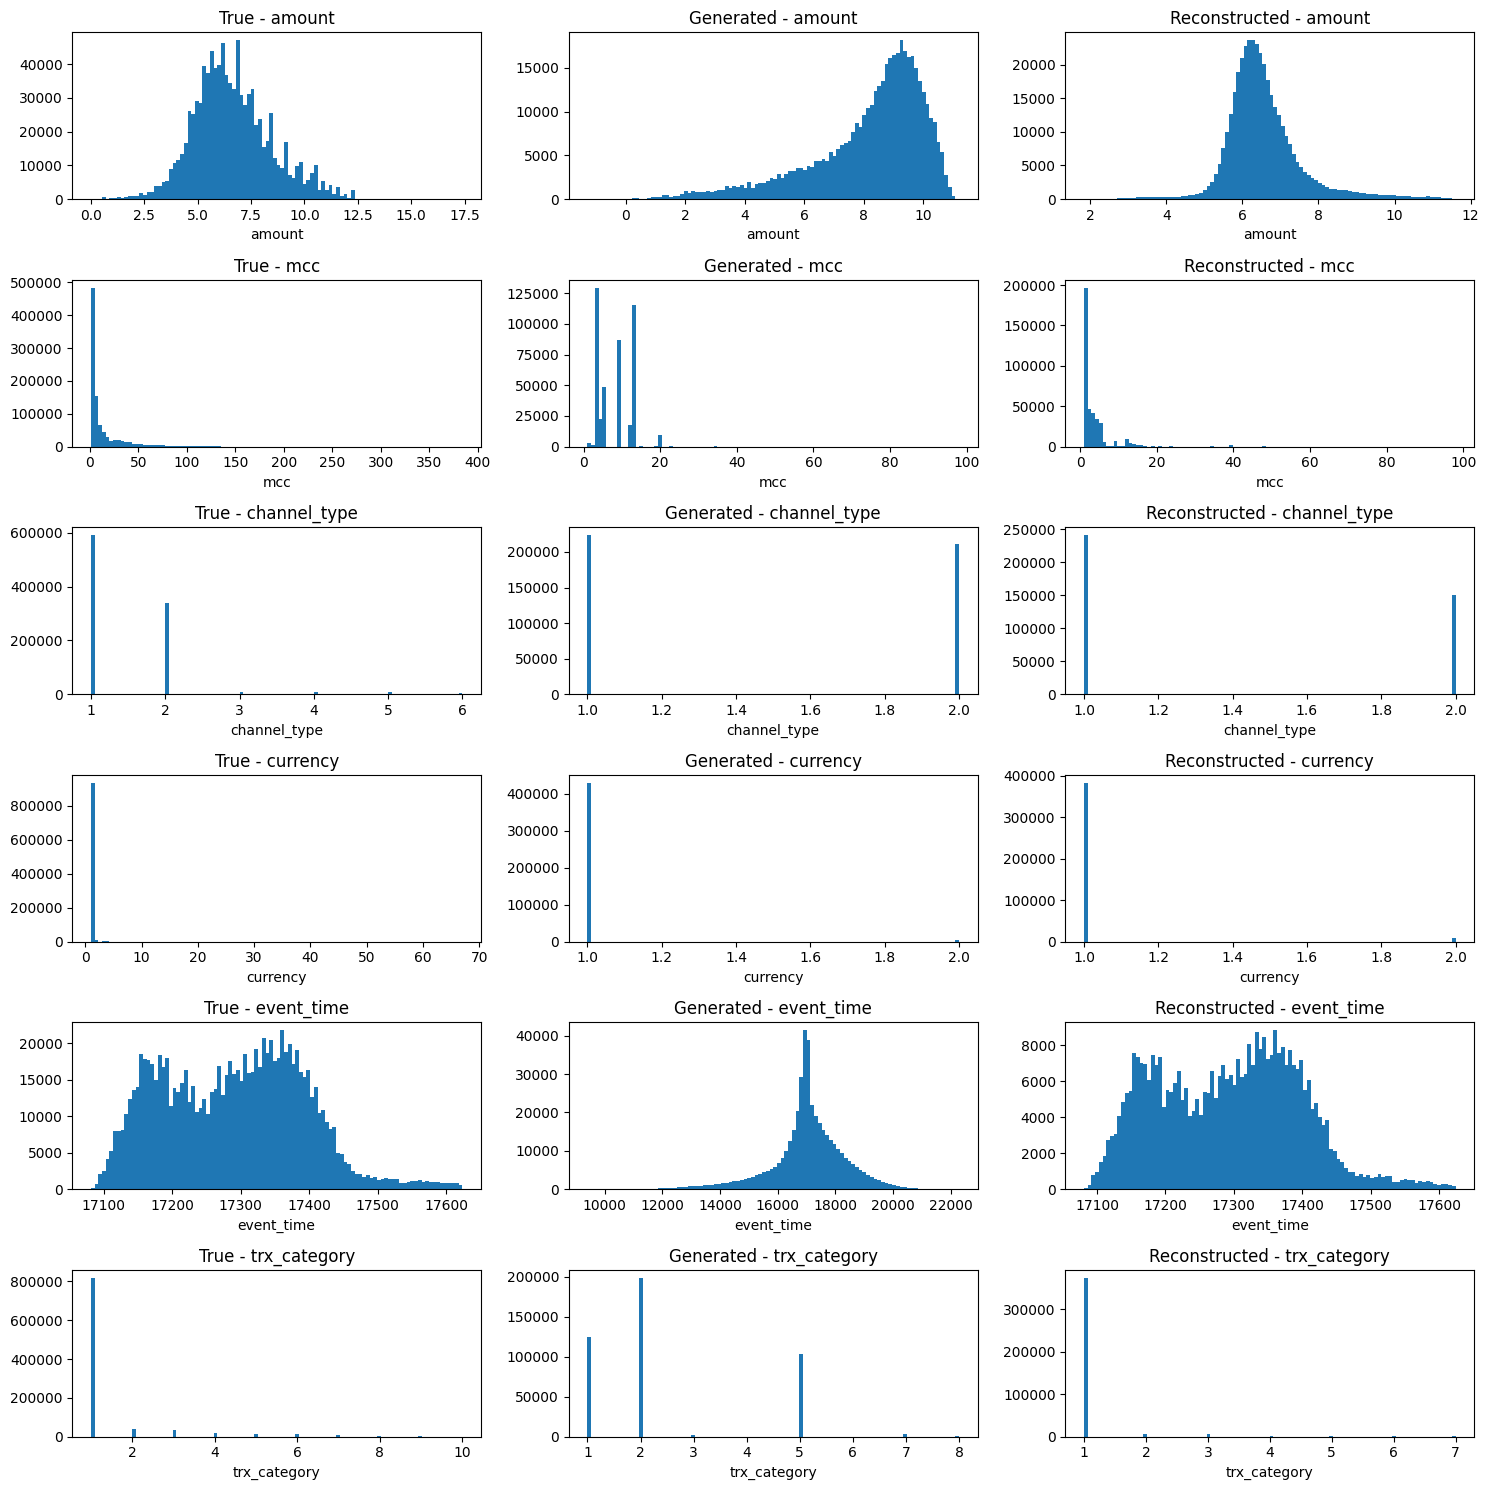

In [46]:
dataframes = [train, gen, recon]
names = ['True', 'Generated', 'Reconstructed']

# List of columns to analyze
cols = ['amount', 'mcc', 'channel_type', 'currency', 'event_time', 'trx_category']

# Create subplots
num_plots = len(cols)
fig, axs = plt.subplots(num_plots, len(dataframes), figsize=(15, 15))

# Iterate through dataframes and columns
for i, df in enumerate(dataframes):
    for j, col in enumerate(cols):
        ax = axs[j, i]
        data = np.hstack(df[col].values)
        ax.hist(data, bins=100)
        ax.set_title(f'{names[i]} - {col}')
        ax.set_xlabel(col)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('rosbank.png')
# Show the plots
plt.show()


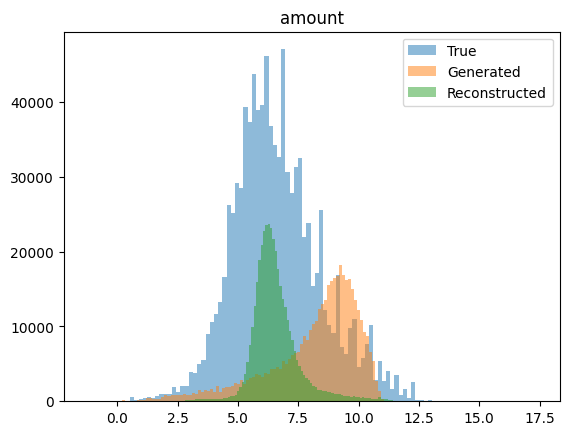

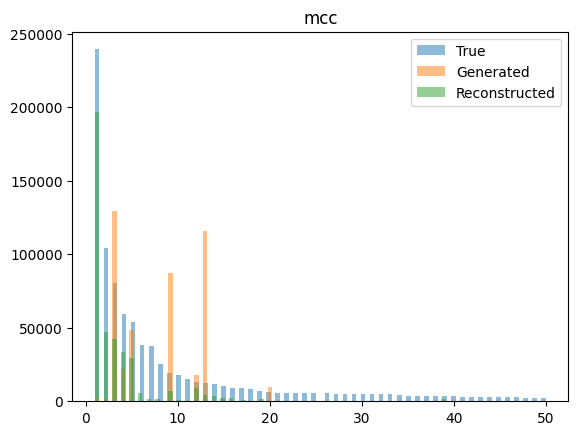

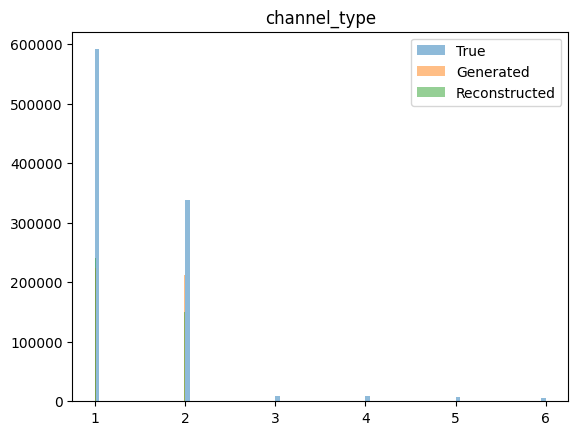

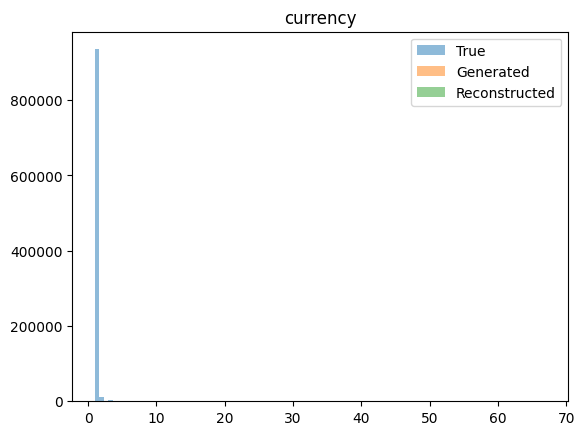

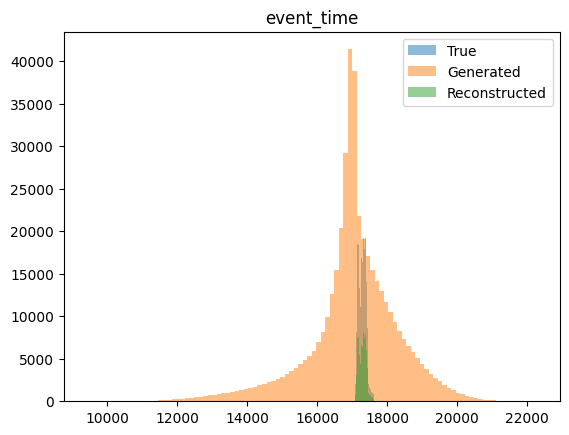

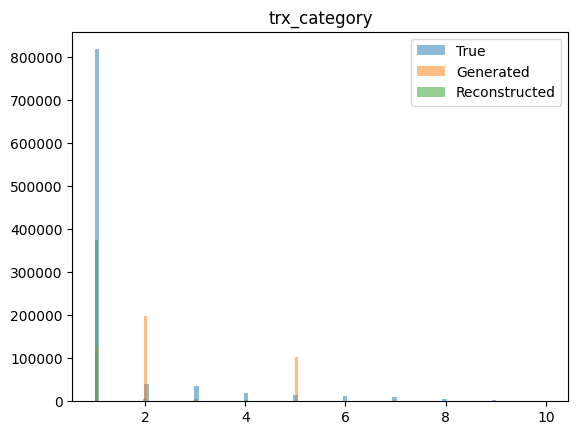

<Figure size 640x480 with 0 Axes>

In [47]:
dataframes = [train, gen, recon]
names = ['True', 'Generated', 'Reconstructed']

# List of columns to analyze
cols = ['amount', 'mcc', 'channel_type', 'currency', 'event_time', 'trx_category']

# Create subplots
num_plots = len(cols)
#fig, axs = plt.subplots(1, num_plots, figsize=(15, 5))

# Iterate through columns
for j, col in enumerate(cols):
    #ax = axs[j]
    
    # Iterate through dataframes
    for i, df in enumerate(dataframes):
        data = np.hstack(df[col].values)
        if col == 'mcc':
            data = data[data <= 50]
      #  ax.hist(data, bins=100, alpha=0.5, label=names[i])
        plt.hist(data, bins=100, alpha=0.5, label=names[i])
    # ax.set_title(col)
    # ax.set_xlabel(col)
    # ax.legend()
    plt.title(col)
    plt.legend()
    plt.savefig(f'rosbank-{col}.png')
    plt.show()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()